In [1]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
from PIL import Image
import imutils


%matplotlib inline

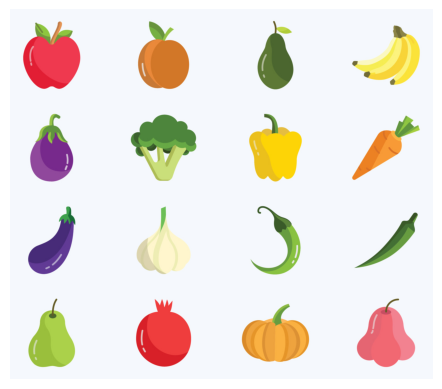

In [2]:
# load the image
image_ = cv2.imread("veget.jpg")
# image = cv2.cvtColor(image_, cv2.COLOR_BGR2GRAY)
# print("image shape",image.shape)
plt.imshow(imutils.opencv2matplotlib(image_))
plt.axis("off")
plt.show()

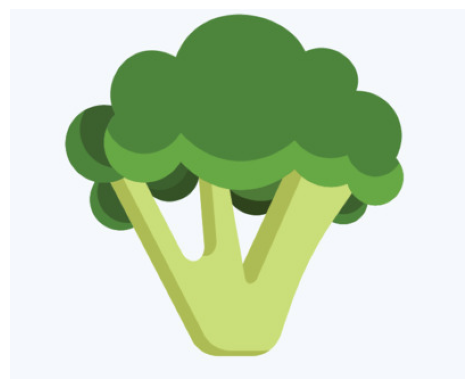

In [3]:
## Extract the template image

templateT1 = image_[475:800, 500:900]
# template = cv2.cvtColor(template_, cv2.COLOR_BGR2GRAY)
# (tempH, tempW) = template.shape[:2]
# print("template shape",template.shape)
plt.imshow(imutils.opencv2matplotlib(templateT1))
plt.axis("off")
plt.show()

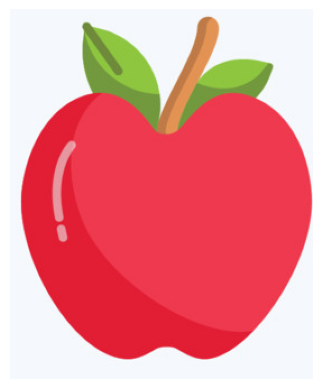

In [4]:
## Extract the template image

templateT2 = image_[50:380, 50:320]
# template = cv2.cvtColor(template_, cv2.COLOR_BGR2GRAY)
# (tempH, tempW) = template.shape[:2]
# print("template shape",template.shape)
plt.imshow(imutils.opencv2matplotlib(templateT2))
plt.axis("off")
plt.show()

In [5]:
# RGB to Grayscale
image = cv2.cvtColor(image_, cv2.COLOR_BGR2GRAY)
template1 = cv2.cvtColor(templateT1, cv2.COLOR_BGR2GRAY)
template2 = cv2.cvtColor(templateT2, cv2.COLOR_BGR2GRAY)

In [7]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [8]:
# compare image function

def compare_images(imageA, imageB):
    # compute  structural similarity index for the images
    s = ssim(imageA, imageB)
    return s

In [9]:
# define the sliding window width and height
winH,winW = template1.shape[:2]
stepS = 8

In [10]:
lst= [] # list to store the metric value of each window
# loop over the sliding window for a given image
for (x, y, window) in sliding_window(image, stepSize=stepS, windowSize=(winW, winH)):
    # if the window does not meet our desired window size, ignore it
    if window.shape[0] != winH or window.shape[1] != winW:
        continue

    lst.append((compare_images(template1, window),x,y))

In [11]:
lst.sort(reverse=True)
lst[0]

(0.8563344121212475, 496, 472)

In [12]:
# Define rectangle points
pt1 = (lst[0][1] , lst[0][2])
pt2 = (pt1[0]+winW , pt1[1]+winH)

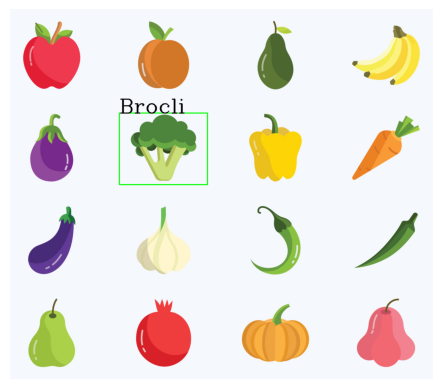

In [13]:
# draw the  window and view the results
clone = image_.copy()
cv2.rectangle(clone, pt1, pt2,(0,255,0),3)
cv2.putText(clone, 'Brocli', pt1, fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 3, thickness=3,color =(0,0, 0))
plt.imshow(imutils.opencv2matplotlib(clone))

plt.axis("off")
plt.show()

In [57]:
# Do the dsame for other templates

In [14]:
# define the sliding window width and height
winH,winW = template2.shape[:2]
stepS = 8

In [15]:
lst= [] # list to store the metric value of each window
# loop over the sliding window for a given image
for (x, y, window) in sliding_window(image, stepSize=stepS, windowSize=(winW, winH)):
    # if the window does not meet our desired window size, ignore it
    if window.shape[0] != winH or window.shape[1] != winW:
        continue

    lst.append((compare_images(template2, window),x,y))

In [16]:
lst.sort(reverse=True)
lst[0]

(0.8848015655440725, 48, 48)

In [17]:
# Define rectangle points
pt1 = (lst[0][1] , lst[0][2])
pt2 = (pt1[0]+winW , pt1[1]+winH)

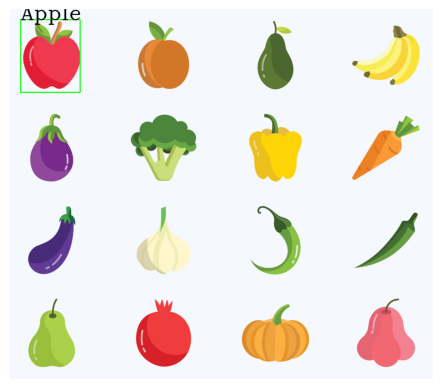

In [18]:
# draw the  window and view the results
clone = image_.copy()
cv2.rectangle(clone, pt1, pt2,(0,255,0),3)
cv2.putText(clone, 'Apple', pt1, fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 3, thickness=3,color =(0,0, 0))
plt.imshow(imutils.opencv2matplotlib(clone))

plt.axis("off")
plt.show()